# PHYS-243 - Spring 2019
## Homework 1 - Due 12-Apr-2019
#### Dr. Mobasher / TA Abtin Shahidi
#### Brandon Evans MSOL

### 1.1 - Recursive to Iterative Function

In [1]:
#Fibonacci sequence is in the form of preceeding 2-terms' sum form next term:  0,1,1,2,3,5,8,13,21,34,55
#This is where F0=0, F1=1, else F(x) = F(x-2)+F(x-1)
import numpy as np
import time
import matplotlib.pyplot as plt

def fibrec(n):
    if n < 0: raise ValueError('Invalid input value: %d' % n)
    if n <= 1:
        return n
    return fibrec(n-2)+fibrec(n-1)

def fibloop(n):
    if n < 0: raise ValueError('Invalid input value: %d' % n)
    fib_array = np.empty([0],dtype=int)
    for i in range(0,n+1):
        if i < 2:
            #The first two iterations are the basic elements of the Fibanacci sequence, 0 and 1
            fib_array = np.append(fib_array,[i],axis=0)
        else:
            #Accessing previous n elements of array made easy with Python syntax
            fib_array = np.append(fib_array,[(fib_array[-1]+fib_array[-2])],axis=0)
    return fib_array[-1] #Result is merely the n-1 element calculated if we over-drive FOR loop by 1 element

### 1.2 Hypothesis of performance between Recursive (fibrec) and Iterative (fibloop) functions:
fibrec(n):  I believe this will be of $O(c^n)$ time due to the recursion required to reach the core elements of the sequence (0 and 1) <br>
fibloop(n): I believe this will be of $O(n)$ time due to a single loop of n+1 iterations

### Do fibrec() and fibloop() functions agree?

In [2]:
def checkFunctionMatch():
    for x in range(0, 20):
        #print("fibrec: %d == %d fibloop" % (fibrec(x), fibloop(x)))
        if fibrec(x) != fibloop(x):
            return False
        return True
print ("Functions agree?: %s" % checkFunctionMatch())

Functions agree?: True


### 1.3 Function Performance

In [3]:
def func_timer(f,n,k,debug=False):
    #Function (f), Fibonacci steps (n), test cycles (k)
    if debug:
        print("Testing %d steps, %d cycles:" % (n, k))
    timer_start = time.time()
    for x in range(0,k):
        f(n)
    elapsed = time.time() - timer_start
    avg_time = round(elapsed/k,5)
    if debug:
        print("Function %s finished in %s secs. Average time: %s secs" % (f,round(elapsed,3),avg_time))
    return avg_time

#for x in range(0,n):
#    fibloop(x)
#print("fibloop() finished in %s secs" % round(time.time() - timer_start,3))
res = func_timer(fibrec,24,30,1)
res = func_timer(fibloop,24,30,1)


Testing 24 steps, 30 cycles:
Function <function fibrec at 0x7f99c83626a8> finished in 0.744 secs. Average time: 0.02481 secs
Testing 24 steps, 30 cycles:
Function <function fibloop at 0x7f999ffabd90> finished in 0.002 secs. Average time: 8e-05 secs


### 1.4 Performance Charts

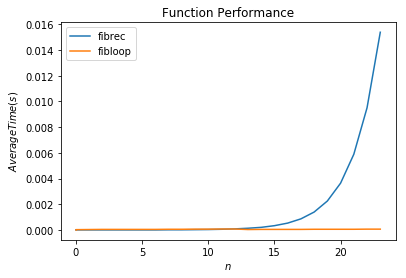

In [7]:
def chartPerformance(steps=24):
    #Steps are Fibonacci sequence numbers
    
    #Abtin, I struggled here to make code cleaner, open to your critique.
    x= np.empty([steps])
    y1 = np.empty([steps])
    y2 = np.empty([steps])
    
    for i in range(0,steps):
        x = np.append(x,i)
        y1 = np.append(y1, func_timer(fibrec,i,60)) #30 test cycles to stabilize average?
        y2 = np.append(y2, func_timer(fibloop,i,60))
    
    #Generally don't like hard-coding stuff
    plt.plot(x,y1, label="fibrec")
    plt.plot(x,y2, label="fibloop") 
    
    plt.title(r"Function Performance")
    plt.xlabel(r"$n$")
    plt.ylabel(r"$Average Time (s)$")
    plt.legend()
    plt.show()
chartPerformance()

# Item 2 - Matrix Math

##### Given:

$$\begin{align}
\mathbf{M}=\begin{bmatrix} 1 & -4 & 2 \\ -4 & 1 & -2 \\ 2 & -2 & -2
\end{bmatrix}
\end{align}$$


#### 2.1 Find the determinant, transpose, inverse(if exist) for M
*Abtin, I couldn't figure out how to left-align text, felt silly that I couldn't find a Latex/Markdown reference for this?

##### Determinant:
$$
|A| = \mathbf{a}*det\begin{bmatrix}e & f \\ h & i\end{bmatrix} - 
\mathbf{b}*det\begin{bmatrix}d & f \\ g & i\end{bmatrix} +
\mathbf{c}*det\begin{bmatrix}d & e \\ g & h\end{bmatrix} \\
|A| = \mathbf{1}*det\begin{bmatrix}1 & -2 \\ -2 & -2\end{bmatrix} - 
\mathbf{-4}*det\begin{bmatrix}-4 & -2 \\ 2 & -2\end{bmatrix} +
\mathbf{2}*det\begin{bmatrix}-4 & 1 \\ 2 & -2\end{bmatrix} \\
|A| = (1)*(-6)-(-4)(12)+(2)(6) \\
\mathbf{|A|}=54 $$


##### Transpose:
$$(\mathbf{M}_{ij})^T = \mathbf{M}_{ji}$$ <br>
$$\mathbf{M}^T=\begin{bmatrix} 1 & -4 & 2 \\ -4 & 1 & -2 \\ 2 & -2 & -2\end{bmatrix}$$

##### Inverse:
Use Gauss-Jordan method to reduce matrix to RREF:

$$
\mathbf{M}^{-1}_{solve}=\begin{bmatrix} 1 & -4 & 2 & |1 & 0 & 0 \\ -4 & 1 & -2 & |0 & 1 & 0 \\ 2 & -2 & -2 & |0 & 0 & 1
\end{bmatrix}
$$

$$
\mathbf{M}^{-1}_{REF}=\begin{bmatrix} -4 & 1 & 2 & |0 & 1 & 0 \\
0 & -3.75 & 1.5 & |1 & 0.25 & 0 \\
0 & 0 & -3.6 & |-0.4 & 0.4 & 1
\end{bmatrix}
$$

$$
\mathbf{M}^{-1}_{RREF}=\begin{bmatrix} 1 & 0 & 0 & | \frac{-1}{9} & \frac{-2}{9} & \frac{1}{9} \\
0 & 1 & 0 & | \frac{-2}{9} & \frac{-1}{9} & \frac{-1}{9} \\
0 & 0 & 1 & | \frac{1}{9} & \frac{-1}{9} & \frac{-5}{18}
\end{bmatrix}
$$

$$
\mathbf{M}^{-1}=\begin{bmatrix} \frac{-1}{9} & \frac{-2}{9} & \frac{1}{9} \\
\frac{-2}{9} & \frac{-1}{9} & \frac{-1}{9} \\
\frac{1}{9} & \frac{-1}{9} & \frac{-5}{18}
\end{bmatrix}
$$
*Handwritten workup attached below

#### 2.2 Find the eigenvalues / eigenvectors
Eigenvalues:
$$\lambda = -3, 6 $$

Eigenvectors
$$\mathbf{x}$$





#### 2.3 Find Gradient
#### 2.4 Hessian
*Attached calculations


# Item 3 - Questions

#### 3.1 Explain the difference between validation and test samples:
Validation samples could be construed as a continuation of training, where the validation set is used to adjust parameters in the model, ideally to find the balance of bias vs. variance (e.g. proper fit).  Test samples are used, once the model is finalized, to test the performance against a new set of data, never seen during training, to reflect on how the model will perform in the field.

#### 3.2 Explain the difference between supervised and unsupervised learning algorithm:
Supervised learning is given labeled data, in order to optimize a model to fit.  Unsupervised learning detects patterns, clusters in unlabeled data.  I think of regression-type problems as being supervised, where we give the model some training data to extract features/weights. Unsupervised examples presented in lecture would be that of finding clusters in genetic sequences.